In this session we will have a look at another application of the SVD. We will use it to compress images. For this purpose we will have a look at how to import pictures in python, how the pictures are stored and how to use the SVD for compression.  
For the sake of simplicity we will first look at an image in grayscale. The code regarding the SVD remains the same. We do not have to implement it again.

In [1]:
# -*- coding: utf-8 -*-
"""
Preparation DataLab:
    Code from https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications
    Mona Lisa Image from https://www.revolutiondatasystems.com/blog/grayscale-or-bitonal-which-is-a-better-method-for-scanning-my-records
    Merkel Image from https://www.sueddeutsche.de/politik/rezension-des-buches-die-kanzlerin-und-ihre-zeit-die-puzzleteile-der-stabilitaet-1.5355469
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import math
import matplotlib.image as mpimg

def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc





For the compression we will use a grayscale picture of Johann Carl Friedrich Gauß. <br>
To work with the image we must first load the image and put it in a format we can work with. As a first step you should have a look at the imread-function from matplotlib.pyplot (matplotlib.org might help). We will use this function to load the image. This means that we have to know exactly what format the picture has after loading it so we can work with it properly. The function shape() from numpy might help to understand the format.  

(193, 170)


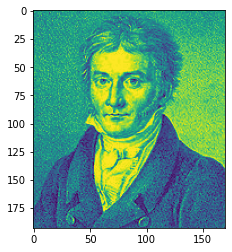

In [2]:
def im2double(im):
    info = np.iinfo(im.dtype)
    return im.astype(float)/info.max
    

# grayscale image (is still saved with 3 channels so I take the first one)
img = plt.imread("gauss3.jpg")[:,:,0]
fig,axs = plt.subplots()
axs.imshow(img)
#The format is (M,N,3) -> RGB image, how do we get the greyscale?
#Just use one of the RGB images
gray_channel = im2double(img)
print(np.shape(gray_channel))



We now have a picture in grayscale, which means that we have a matrix A where the grey-value of every pixel is stored. The next step is to use SVD to compress it. <br>
As a preparation try to plot the SV of the matrix A and think about what the decay behaviour of the singular values means for the quality of our compression.

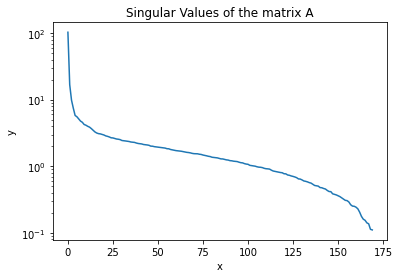

In [3]:
#my implementation
U, S, V = svd(gray_channel)

#linalg library implementation
U_, S_, V_ = np.linalg.svd(gray_channel)

# Plot the Singular Values and try to think about what this means for the quality of the compressed images
fig,axs = plt.subplots()
axs.set_title(f"Singular Values of the matrix A")
axs.set_xlabel(f"x")
axs.set_ylabel(f"y")

axs.semilogy(S)




How many SV can we truncate and still have a "good" picture? (Hint: Try to Google the Eckart-Young-Theorem)<br>
<br>
We will now truncate and plot the resulting pictures. Try to plot the resulting picture for different values of k as well as the shape of the matrix you are plotting. What can you observe? 


(193, 170)
(193, 170)
(193, 170)
(193, 170)
(193, 170)
(193, 170)
(193, 170)
(193, 170)
(193, 170)


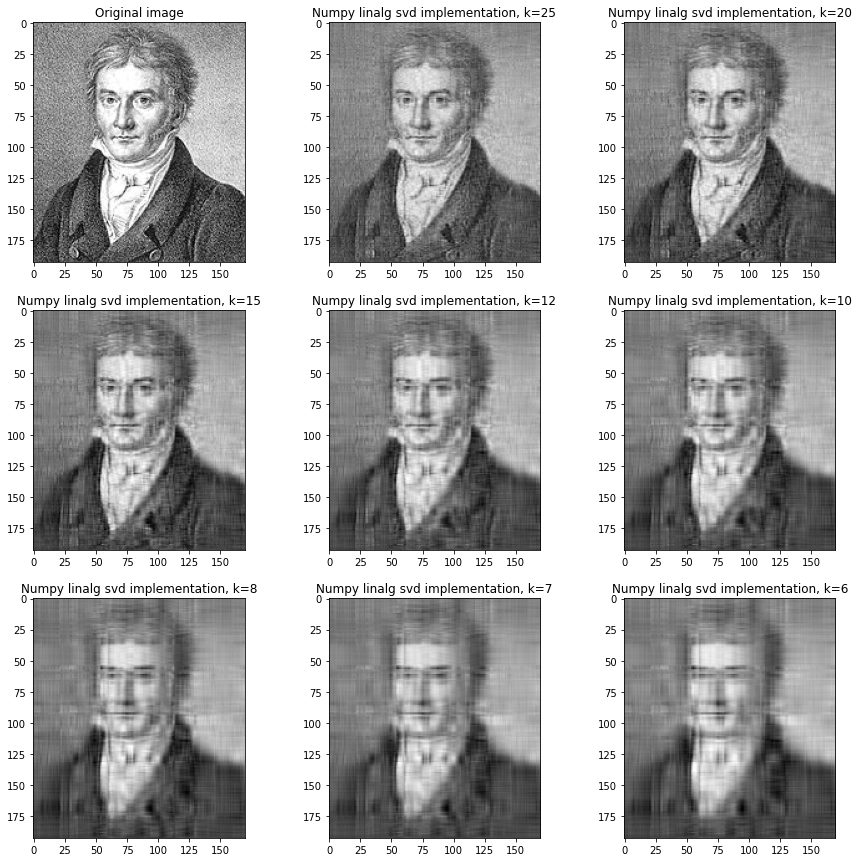

In [4]:
#number of singular values kept
k = [50,25,20,15,12,10,8,7,6]

row_count = math.ceil(len(k)/3)
column_count = math.ceil(len(k)/row_count)

fig,axs = plt.subplots(row_count,column_count,figsize=(15,15))
#plt.ion()
cnt = 0
for i in range(row_count):
    for j in range(column_count):
        U_trunc, S_trunc, Vt_trunc = truncate(U, S, V, k[cnt])
        _U_trunc, _S_trunc, _Vt_trunc = truncate(U_, S_, V_, k[cnt])
        
        my_channel =  U_trunc @ np.diag(S_trunc) @ Vt_trunc
        linalg_channel =  _U_trunc @ np.diag(_S_trunc) @ _Vt_trunc
        print(np.shape(linalg_channel))
        if i==0 and j==0:
            axs[i,j].set_title(f"Original image")
            axs[i,j].imshow(gray_channel, cmap='gray')
            cnt = cnt+1
        else:
            axs[i,j].set_title(f"Numpy linalg svd implementation, k={k[cnt]}")
            axs[i,j].imshow(linalg_channel, cmap='gray')
            cnt = cnt+1

Let's think about the quality of the pictures we created. One may ask the question: For what values of k can an AI still recognize JCF Gauss on this picture?  <br>
At this point we will not implement AI for image recognition. We will use the site https://imagerecognize.com/celebrities/ where we can upload pictured from celebrities and they will tell us which celebrity it is and how sure it is. To realize this you have to plot the image for different values of k (try to do so using subplots and create one figure with pictures of JCF Gauss with different values of k).

---
In the next step we will have a look at a colour picture. Colour pictures consist of 3 different matrixes. One of the three matrices contains the values of the colour red, one of the colour blue and one of the colour green (that's why the image is called RGB-image). The values range from 0 to 255. To create the images from the R/G- and B channels we will use the package OpenCV (https://docs.opencv.org/master/d6/d00/tutorial_py_root.html). You can read the documentation for the functions we need at https://docs.opencv.org/master/d2/de8/group__core__array.html#ga7d7b4d6c6ee504b30a20b1680029c7b4 (we need the cv2.merge() function).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 299.5, 167.5, -0.5)

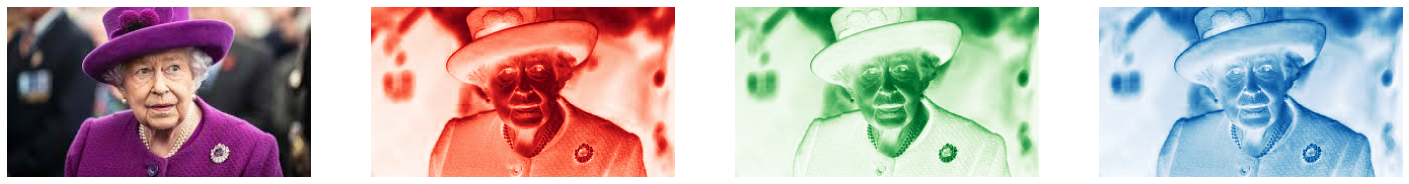

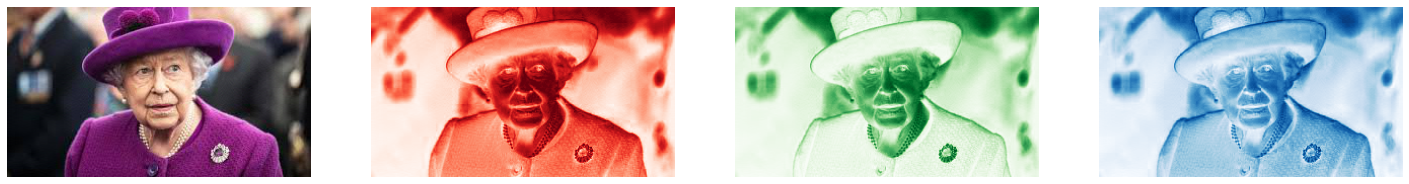

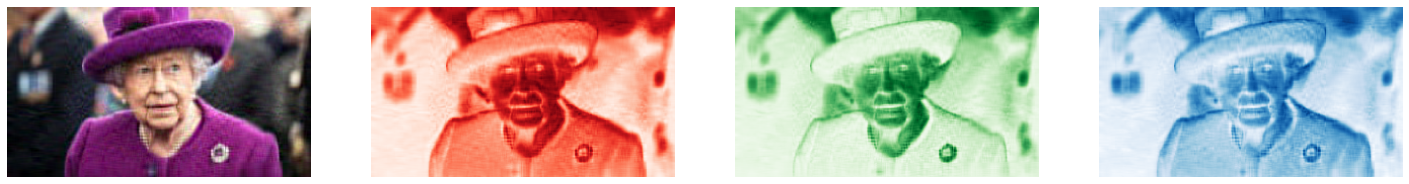

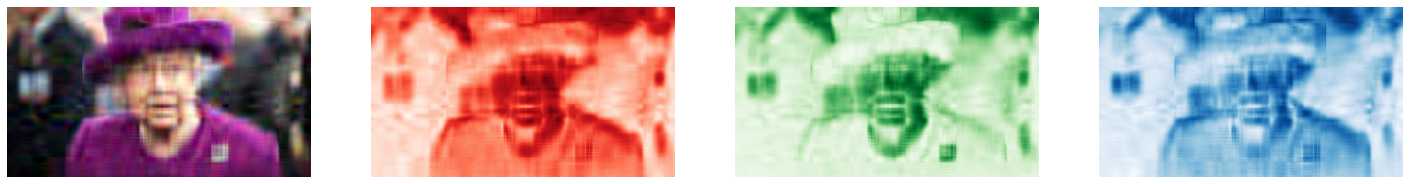

In [11]:
# http://www.math.utah.edu/~goller/F15_M2270/BradyMathews_SVDImage.pdf Idee und Theorie

from astropy.visualization import make_lupton_rgb
import cv2 

def scaleImage(red,green,blue):
    red[red<0] = 0
    red[red>1] = 1
    green[green<0] = 0
    green[green>1] = 1
    blue[blue<0] = 0
    blue[blue>1] = 1
    return red,green,blue



#getting image channels
rgb_img = mpimg.imread("queen.jpg")

red_channel = im2double(rgb_img[:, :, 0])

green_channel = im2double(rgb_img[:, :, 1])

blue_channel = im2double(rgb_img[:, :, 2])

#get SVD factorization
r_U, r_S, r_V = svd(red_channel)
g_U, g_S, g_V = svd(green_channel)
b_U, b_S, b_V = svd(blue_channel)

r_new_channel = r_U @ np.diag(r_S) @ r_V
g_new_channel = g_U @ np.diag(g_S) @ g_V
b_new_channel = b_U @ np.diag(b_S) @ b_V

fig,axs = plt.subplots(1,4,figsize=(25,25))

rgb_img = cv2.merge((red_channel, green_channel, blue_channel))
axs[0].imshow(rgb_img)
axs[0].axis("off")

axs[1].imshow(red_channel,cmap='Reds')
axs[1].axis("off")

axs[2].imshow(green_channel,cmap='Greens')
axs[2].axis("off")

axs[3].imshow(blue_channel,cmap='Blues')
axs[3].axis("off")


#svd with different values for k 
k = 100

r_U_trunc, r_S_trunc, r_Vt_trunc = truncate(r_U, r_S, r_V, k)
g_U_trunc, g_S_trunc, g_Vt_trunc = truncate(g_U, g_S, g_V, k)
b_U_trunc, b_S_trunc, b_Vt_trunc = truncate(b_U, b_S, b_V, k)

r_new_channel =  r_U_trunc @ np.diag(r_S_trunc) @ r_Vt_trunc
g_new_channel = g_U_trunc @ np.diag(g_S_trunc) @ g_Vt_trunc
b_new_channel = b_U_trunc @ np.diag(b_S_trunc) @ b_Vt_trunc

r_new_channel,g_new_channel,b_new_channel = scaleImage(r_new_channel,g_new_channel,b_new_channel)


image = cv2.merge((r_new_channel, g_new_channel, b_new_channel))

fig,axs = plt.subplots(1,4,figsize=(25,25))

axs[0].imshow(image)
axs[0].axis("off")

axs[1].imshow(r_new_channel,cmap='Reds')
axs[1].axis("off")

axs[2].imshow(g_new_channel,cmap='Greens')
axs[2].axis("off")

axs[3].imshow(b_new_channel,cmap='Blues')
axs[3].axis("off")


k = 25

r_U_trunc, r_S_trunc, r_Vt_trunc = truncate(r_U, r_S, r_V, k)
g_U_trunc, g_S_trunc, g_Vt_trunc = truncate(g_U, g_S, g_V, k)
b_U_trunc, b_S_trunc, b_Vt_trunc = truncate(b_U, b_S, b_V, k)

r_new_channel =  r_U_trunc @ np.diag(r_S_trunc) @ r_Vt_trunc
g_new_channel = g_U_trunc @ np.diag(g_S_trunc) @ g_Vt_trunc
b_new_channel = b_U_trunc @ np.diag(b_S_trunc) @ b_Vt_trunc

r_new_channel,g_new_channel,b_new_channel = scaleImage(r_new_channel,g_new_channel,b_new_channel)
image = cv2.merge((r_new_channel, g_new_channel, b_new_channel))

fig,axs = plt.subplots(1,4,figsize=(25,25))

axs[0].imshow(image)
axs[0].axis("off")

axs[1].imshow(r_new_channel,cmap='Reds')
axs[1].axis("off")

axs[2].imshow(g_new_channel,cmap='Greens')
axs[2].axis("off")

axs[3].imshow(b_new_channel,cmap='Blues')
axs[3].axis("off")



#get SVD factorization
k = 10

r_U_trunc, r_S_trunc, r_Vt_trunc = truncate(r_U, r_S, r_V, k)
g_U_trunc, g_S_trunc, g_Vt_trunc = truncate(g_U, g_S, g_V, k)
b_U_trunc, b_S_trunc, b_Vt_trunc = truncate(b_U, b_S, b_V, k)

r_new_channel =  r_U_trunc @ np.diag(r_S_trunc) @ r_Vt_trunc
g_new_channel =g_U_trunc @ np.diag(g_S_trunc) @ g_Vt_trunc
b_new_channel = b_U_trunc @ np.diag(b_S_trunc) @ b_Vt_trunc
r_new_channel,g_new_channel,b_new_channel = scaleImage(r_new_channel,g_new_channel,b_new_channel)

image = cv2.merge((r_new_channel, g_new_channel, b_new_channel))

fig,axs = plt.subplots(1,4,figsize=(25,25))

axs[0].imshow(image)
axs[0].axis("off")

axs[1].imshow(r_new_channel,cmap='Reds')
axs[1].axis("off")

axs[2].imshow(g_new_channel,cmap='Greens')
axs[2].axis("off")

axs[3].imshow(b_new_channel,cmap='Blues')
axs[3].axis("off")


We now truncated the same amount of singular values for each color. Is there a way to do this in a more "scientific" way? Try to have a look at the singular values for each color and think about truncating a different amount of singular values for each colour.

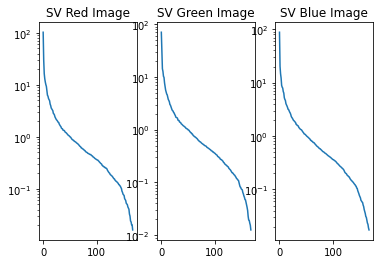

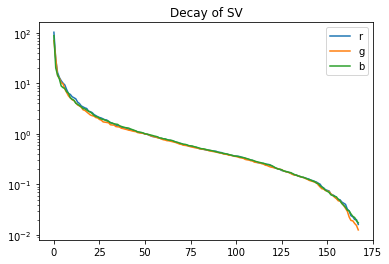

In [6]:
fig,axs = plt.subplots(1,3)

axs[0].semilogy(r_S)
axs[0].set_title(f"SV Red Image")

axs[1].semilogy(g_S)
axs[1].set_title(f"SV Green Image")

axs[2].semilogy(b_S)
axs[2].set_title(f"SV Blue Image")



fig,axs = plt.subplots()


axs.semilogy(r_S)
axs.semilogy(g_S)
axs.semilogy(b_S)

axs.set_title("Decay of SV")
axs.legend(['r', 'g', 'b'])




R schneller als b schneller als g -> gutes Bild?